# EXERCÍCIO


Nas aulas anteriores nós fizemos os testes de hipóteses utilizando técnicas de estatística não paramétrica. Porém, como os resultados dos algoritmos seguem uma distribuição normal (conforme os testes de normalidade realizados), o objetivo desta tarefa é aplicar o ANOVA e também o teste de Tukey para comparar os resultados dos algoritmos

In [1]:
import math
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFdr, chi2
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("CSVs/credit_data.csv")
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
X = df.iloc[:,1:4].values
y = df.iloc[:,4].values

In [4]:
min(X[0]), max(X[0])

(59.017015066929204, 66155.9250950813)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
min(X[0]), max(X[0])

(1.2019070702053862, 1.4538977547824534)

In [7]:
result_nb = []
result_lr = []
result_rf = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    nb = GaussianNB()
    scores = cross_val_score(nb, X, y, cv = kfold)
    result_nb.append(scores.mean())
    
    lr = LogisticRegression()
    scores = cross_val_score(lr, X, y, cv = kfold)
    result_lr.append(scores.mean())
    
    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X, y, cv = kfold)
    result_rf.append(scores.mean())
    
result_nb = np.array(result_nb)
result_lr = np.array(result_lr)
result_rf = np.array(result_rf)

In [8]:
result_nb.mean(),result_lr.mean(),result_rf.mean()

(0.9249859296482411, 0.9457008375209381, 0.9870474874371861)

### ANOVA e Tukey - algorítmos

In [9]:
from scipy.stats import f_oneway

In [10]:
_, p = f_oneway(result_nb, result_lr, result_rf)
p

9.315976847897163e-117

In [11]:
alpha = 0.05
if p <= alpha:
    print('Hipótese (H0) nula rejeitada')
else:
    print('Hipótese alternativa (H1) rejeitada')

Hipótese (H0) nula rejeitada


In [12]:
cls_nb = ['nb']*30
cls_lr = ['lr']*30
cls_rf = ['rf']*30

In [13]:
results = {"acc": np.concatenate([result_nb, result_lr, result_rf]),
           "algor": np.concatenate([cls_nb, cls_lr, cls_rf])}

df = pd.DataFrame(results)
df.head()

,acc,algor
0,0.924862,nb
1,0.924917,nb
2,0.924387,nb
3,0.922882,nb
4,0.924872,nb


In [14]:
df.tail()

,acc,algor
85,0.985990,rf
86,0.984477,rf
87,0.988982,rf
88,0.987992,rf
89,0.988487,rf


In [15]:
from statsmodels.stats.multicomp import MultiComparison

In [16]:
compare_gr = MultiComparison(df['acc'], df['algor'])
test = compare_gr.tukeyhsd()
print(test)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    lr     nb  -0.0207 0.001 -0.0215  -0.02   True
    lr     rf   0.0413 0.001  0.0406 0.0421   True
    nb     rf   0.0621 0.001  0.0613 0.0628   True
--------------------------------------------------


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

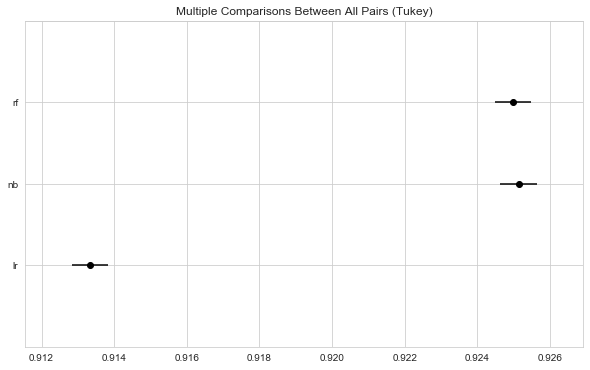

In [31]:
test.plot_simultaneous();

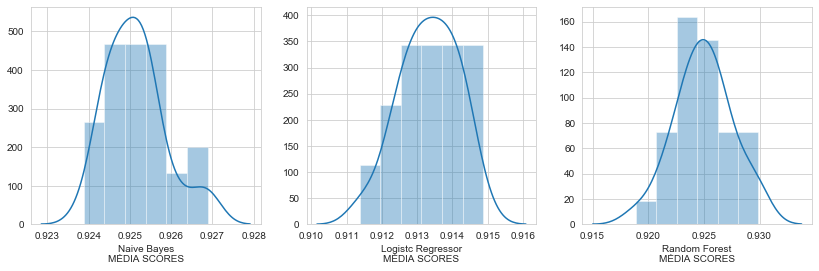

In [32]:
_, ax = plt.subplots(1,3, figsize=(14,4))

sns.distplot(result_nb, ax = ax[0], axlabel='Naive Bayes\nMÉDIA SCORES')
sns.distplot(result_lr, ax = ax[1], axlabel='Logistic Regressor\nMÉDIA SCORES')
sns.distplot(result_rf, ax = ax[2], axlabel='Random Forest\nMÉDIA SCORES');

In [20]:
from sklearn.feature_selection import f_classif

In [21]:
select = SelectFdr(f_classif, alpha = 0.01)
X_new_f = select.fit_transform(X, y)

In [22]:
X.shape, X_new_f.shape

((1997, 3), (1997, 2))

In [23]:
result_nb = []
result_lr = []
result_rf = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    nb = GaussianNB()
    scores = cross_val_score(nb, X_new_f, y, cv = kfold)
    result_nb.append(scores.mean())
    
    lr = LogisticRegression()
    scores = cross_val_score(lr, X_new_f, y, cv = kfold)
    result_lr.append(scores.mean())
    
    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X_new_f, y, cv = kfold)
    result_rf.append(scores.mean())
    
result_nb = np.array(result_nb)
result_lr = np.array(result_lr)
result_rf = np.array(result_rf)

In [24]:
result_nb.mean(),result_lr.mean(),result_rf.mean()

(0.9251358458961474, 0.9133342546063653, 0.9249736180904523)

In [25]:
alpha = 0.05
if p <= alpha:
    print('Hipótese (H0) nula rejeitada')
else:
    print('Hipótese alternativa (H1) rejeitada')

Hipótese (H0) nula rejeitada


In [26]:
df['acc_f'] = np.concatenate([result_nb, result_lr, result_rf])
df.head()

,acc,algor,acc_f
0,0.924862,nb,0.924359
1,0.924917,nb,0.924412
2,0.924387,nb,0.924887
3,0.922882,nb,0.923882
4,0.924872,nb,0.924872


In [27]:
compare_gr = MultiComparison(df['acc_f'], df['algor'])
test = compare_gr.tukeyhsd()
print(test)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    lr     nb   0.0118 0.001  0.0108 0.0128   True
    lr     rf   0.0116 0.001  0.0106 0.0126   True
    nb     rf  -0.0002   0.9 -0.0012 0.0008  False
--------------------------------------------------


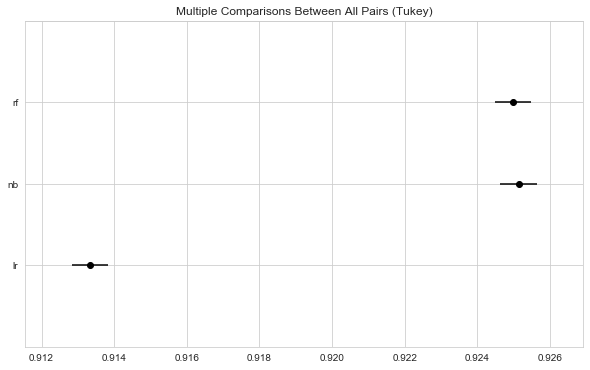

In [28]:
test.plot_simultaneous();

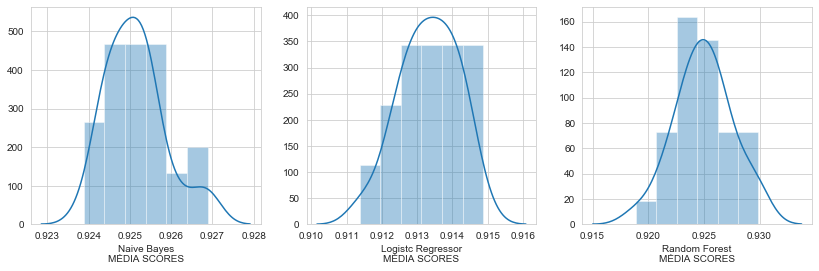

In [29]:
_, ax = plt.subplots(1,3, figsize=(14,4))
sns.set_style('whitegrid')
sns.distplot(result_nb, ax = ax[0], axlabel='Naive Bayes\nMÉDIA SCORES')
sns.distplot(result_lr, ax = ax[1], axlabel='Logistic Regressor\nMÉDIA SCORES')
sns.distplot(result_rf, ax = ax[2], axlabel='Random Forest\nMÉDIA SCORES');